In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import seaborn as sns
sns.set_style("darkgrid")

### Load the dataset from the file Ecommerce.csv

```
This dataset includes the following data for 200 online customers:

- Email
- Adress
- Avatar
- Avg Session Length (everage time they spent on usage)
- Time on App (time they spent using the application)
- Time on Website (time they spent using the website)
- Length of Membership (for how long they have been a user)
- Yearly Amount Spent (how much money they spend yearly)

Yout goal will be to estimate the value of the Yearly Amount Spent using the feature(s) of the users
```

In [6]:
data = pd.read_csv('Ecommerce.csv')
data.head()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg Session Length    500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### Get rid of non-numerical columns of the dataset

In [9]:
data = data.select_dtypes(exclude=['object'])
data.head()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


### Use Yearly Amount Spent as your target variable. Plot the relationship of each of the numerical features with the target variable

In [10]:
target = data['Yearly Amount Spent']
features = data[data.columns.difference(['Yearly Amount Spent'])]

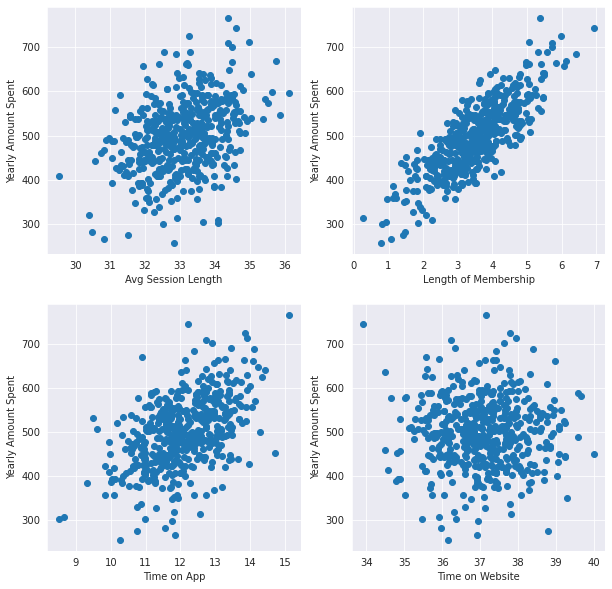

In [11]:
fig, ax = plt.subplots(2, 2)
fig.set_figwidth(10)
fig.set_figheight(10)

for i, feature in enumerate(features.columns):
    ax[i//2, i%2].scatter(features[feature], target)
    ax[i//2, i%2].set_xlabel(feature)
    ax[i//2, i%2].set_ylabel(target.name)

We can clearly see that there is a strong linear relationship between Length of membership and Yearly Amount Spent. 
We can make sure by looking at correlation coefficients.

In [12]:
data.corr()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


### Leave only one feature that has a linear relationship with the target variable.

In [13]:
important_feature = features['Length of Membership']
important_feature[:5]

0    4.082621
1    2.664034
2    4.104543
3    3.120179
4    4.446308
Name: Length of Membership, dtype: float64

### Divide the dataset into training and test sets with the ratio 80:20.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(important_feature, target, test_size=0.2, shuffle=True)

### Use the resulting train and test sets with the next 2 functions to fit linear regression and plot the resulting regression line.

The first function is `fit_1d_linear_regression` that takes two vectors $x$ and $y$, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope. 

In [51]:
def fit_1d_linear_regression(data_vector, response_vector):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    Note: You can avoid the intercept for simplicity
    """
    data_vector = np.array(data_vector)
    response_vector = np.array(response_vector)
    n = data_vector.shape[0] #number of samples

    if(data_vector.ndim == 1): 
        X = data_vector.reshape(-1,1)
    X = np.concatenate((np.ones((n, 1)), X), axis=1)
    """
    If the columns of X are linearly independent, X'X will be invertible,
    so we can use the following.
    w = (X'X)^(-1)X'y
    where X is a matrix with columns [1,..,1] and data_vector
    w is the vector beta of coefficients of the regression
    y is the response_vector
    In our case columns of X are linearly independent, so we can use it.
    """
    
    XtX_inverse = np.linalg.inv(np.dot(X.T, X))
    return np.dot(XtX_inverse, np.dot(X.T, response_vector))

In [52]:
fit_1d_linear_regression(np.array([1,2,3]), np.array([4,5,6]))

array([3., 1.])

In [53]:
fit_1d_linear_regression(np.array([[1,10],[2,0],[3,3]]), np.array([4,5,6]))

UnboundLocalError: local variable 'X' referenced before assignment

The second function is `plot_line` function, that takes $\beta_0, \beta_1, x, y$ and plots a scatter plot of the data, and the line $y = \beta_0 + \beta_1 x$. And saves the plot in `YOURNAME.png`

In [54]:
def plot_fitted_line(b0: float,
                     b1: float,
                     x,
                     y,
                     username: str):
    """
    :param b0: Intersept of line to plot
    Note: avoid this if you don't have an intercept in the previous function
    :param b1: Slope of the line to plot
    :param x: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x coordinates)
    :param y: A pandas series object (i.e. a column of a dataframe),
                        where each element is a label (y coordinates)
    """
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y)
    plt.plot(x, b0 + b1*x, color='orange', linewidth=3, label=f"{b0:.2f} + {b1:.2f}x")
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.title("Regression line "+x.name+" vs "+y.name)
    plt.legend()
    
    #plt.savefig(f'{username}.png', bbox_inches='tight')

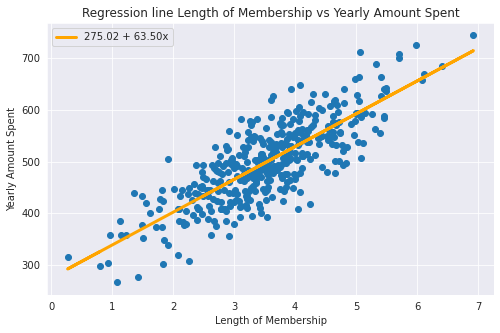

In [55]:
coeffs = fit_1d_linear_regression(X_train, y_train)
plot_fitted_line(coeffs[0], coeffs[1], X_train, y_train, 'Mariam Basentsyan')

### Plot example

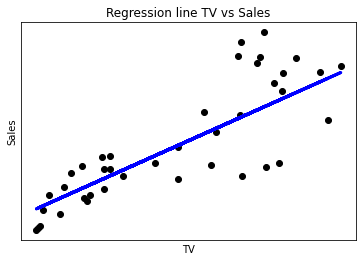

### Now fit the linear regression to the data containing only 1 feature using sklearn and compare the results with your own fit_1d_linear_regression function

In [56]:
from sklearn import linear_model
linreg = linear_model.LinearRegression()
linreg.fit(X_train.to_frame(), y_train)
print(f"sklearn result: \nintercept: {linreg.intercept_}, slope: {linreg.coef_}")
print(f"my result: \nintercept: {coeffs[0]}, slope: {coeffs[1]}")

sklearn result: 
intercept: 275.0218058416111, slope: [63.49878662]
my result: 
intercept: 275.0218058416176, slope: 63.498786619605426


The results are almost the same with an error small enough that can be ignored.

### Use sklearn.metrics to calculate Mean absolute error, Mean squared error, Root mean squared error and R-squared for the results of your own function vs the sklearn regression results. Try to interprete your results.

In [58]:
def predict(X, coeffs):
    n = X.shape[0] #number of samples
    #if data_x is a 1d vector with shape (n, ), convert it to 2d column vector with shape (n, 1)
    #if we don't do this, the concatenation will not work for the vector with shape (n, )
    if(X.ndim == 1): 
        X = X[:, np.newaxis]
    
    X = np.concatenate((np.ones((n, 1)), X), axis=1)
    return np.dot(X, coeffs)

In [59]:
my_predictions = predict(X_test, coeffs);
sklearn_predictions = linreg.predict(X_test.to_frame())

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(f"mean absolute error: \nmy result: {mean_absolute_error(y_test, my_predictions): .3f}") 
print(f"sklearn: {mean_absolute_error(y_test, sklearn_predictions): .3f}\n")

print(f"mean squared error: \nmy result: {mean_squared_error(y_test, my_predictions): .3f}")
print(f"sklearn: {mean_squared_error(y_test, sklearn_predictions): .3f}\n")

print(f"root mean squared error: \nmy result: {np.sqrt(mean_squared_error(y_test, my_predictions)): .3f}")
print(f"sklearn: {np.sqrt(mean_squared_error(y_test, sklearn_predictions)): .3f}\n")

print(f"R-squared: \nmy result: {r2_score(y_test, my_predictions): .4f}")
print(f"sklearn: {r2_score(y_test, sklearn_predictions): .4f}")

mean absolute error: 
my result:  37.913
sklearn:  37.913

mean squared error: 
my result:  2194.219
sklearn:  2194.219

root mean squared error: 
my result:  46.842
sklearn:  46.842

R-squared: 
my result:  0.6789
sklearn:  0.6789


It is not surprising that the results are the same, because in our case we had analytical solution.
By looking at R-squared we can see that the model is not so bad but it is far from ideal which is not unexpected because we used only one feature for predicting and the size of our dataset isn't big. 

### Fit linear regression to the data containing all numerical features using sklearn and use the same metrics to evaluate how good the model is.

In [60]:
X_Train, X_Test, y_Train, y_Test = train_test_split(features, target, test_size=0.2, shuffle=True)

linreg_multiple_features = linear_model.LinearRegression()
linreg_multiple_features.fit(X_Train, y_Train)

y_predicted = linreg_multiple_features.predict(X_Test)

print("Results: \nCoefficients:", linreg_multiple_features.coef_, linreg_multiple_features.intercept_)
print("\nMAE: %.3f" %mean_absolute_error(y_Test, y_predicted))
print("MSE: %.3f" %mean_squared_error(y_Test, y_predicted))
print("RMSE: %.3f" %np.sqrt(mean_squared_error(y_Test, y_predicted)))
print("\nR-squared: %.4f" %r2_score(y_Test, y_predicted))

Results: 
Coefficients: [25.49901836 62.04400066 38.89289681  0.16855064] -1037.770587578647

MAE: 8.601
MSE: 125.539
RMSE: 11.204

R-squared: 0.9803


As we can see adding more features improved the prediction quality. 

### Implement K-fold Cross Validation

In [61]:
def k_fold(x, n_splits=5):
    """
    x: the data that has to be splitted into folds
    n_splits: number of folds 
    returns arrays of indices for train and test
    """
    if(n_splits <= 1):
        raise Exception("Number of folds must be at least 2.") 
    
    n_samples = len(x)
    """
    The first n_samples % n_splits folds (first_folds_count) have size n_samples // n_splits + 1, 
    other folds have size n_samples // n_splits, 
    where n_samples is the number of samples.
    """
    first_folds_count = n_samples % n_splits
    fold_size = n_samples//n_splits
    fold_size += 1*(first_folds_count != 0)
    indices_set = np.arange(n_samples)
    test_start = 0
    test_end = fold_size
    
    while(test_end <= n_samples):
        #divide indices_set between test and train
        test_indices = indices_set[test_start: test_end]
        train_indices = indices_set[(indices_set < test_start) | (indices_set >= test_end)]
        yield (train_indices, test_indices) 
        first_folds_count -= 1
        test_start += fold_size
        #if first_folds_count is 0, change fold_size to n_samples // n_splits, i.e. subtract 1 
        fold_size -= 1*(first_folds_count == 0)
        test_end += fold_size

In [62]:
from sklearn.model_selection import KFold

In [63]:
#testing
for sample_size, k in [(9, 5), (5, 5), (7, 2)]:
    x = np.arange(1, sample_size+1)
    print("x: ", x, "\nk: ", k, '\nmy result: ')
    for train_index, test_index in k_fold(x, k): #my function
        print(train_index, test_index)
    print('sklearn result: ')
    cv = KFold(n_splits=k)
    for train_index, test_index in cv.split(x): #sklearn function
        print(train_index, test_index)
    print()

x:  [1 2 3 4 5 6 7 8 9] 
k:  5 
my result: 
[2 3 4 5 6 7 8] [0 1]
[0 1 4 5 6 7 8] [2 3]
[0 1 2 3 6 7 8] [4 5]
[0 1 2 3 4 5 8] [6 7]
[0 1 2 3 4 5 6 7] [8]
sklearn result: 
[2 3 4 5 6 7 8] [0 1]
[0 1 4 5 6 7 8] [2 3]
[0 1 2 3 6 7 8] [4 5]
[0 1 2 3 4 5 8] [6 7]
[0 1 2 3 4 5 6 7] [8]

x:  [1 2 3 4 5] 
k:  5 
my result: 
[1 2 3 4] [0]
[0 2 3 4] [1]
[0 1 3 4] [2]
[0 1 2 4] [3]
[0 1 2 3] [4]
sklearn result: 
[1 2 3 4] [0]
[0 2 3 4] [1]
[0 1 3 4] [2]
[0 1 2 4] [3]
[0 1 2 3] [4]

x:  [1 2 3 4 5 6 7] 
k:  2 
my result: 
[4 5 6] [0 1 2 3]
[0 1 2 3] [4 5 6]
sklearn result: 
[4 5 6] [0 1 2 3]
[0 1 2 3] [4 5 6]



### Evaluate model with K-fold

In [64]:
features.head(2)

,Avg Session Length,Length of Membership,Time on App,Time on Website
0,34.497268,4.082621,12.655651,39.577668
1,31.926272,2.664034,11.109461,37.268959


In [65]:
target[:2]

0    587.951054
1    392.204933
Name: Yearly Amount Spent, dtype: float64

In [66]:
r2_scores = []
rmse_scores = []
model = linear_model.LinearRegression()
cv = KFold(n_splits=5)

for train_index, test_index in cv.split(features):
    X_train, X_test, y_train, y_test = features.loc[train_index], features.loc[test_index], target.loc[train_index], target.loc[test_index]
    model.fit(X_train, y_train)
    r2_scores.append(model.score(X_test, y_test))
    predicted_y = model.predict(X_test)
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, predicted_y)))

mean_r2score = np.mean(r2_scores)
print("The mean value of R2-scores: ", mean_r2score)
mean_rmse = np.mean(rmse_scores)
print("The mean value of RMSEs: ", mean_rmse)

The mean value of R2-scores:  0.9836940897539079
The mean value of RMSEs:  10.01576163217454


In [67]:
#doing the same using k_fold() function written by me 
r2_scores = []
rmse_scores = []
model = linear_model.LinearRegression()

for train_index, test_index in k_fold(features, 5):
    X_train, X_test, y_train, y_test = features.loc[train_index], features.loc[test_index], target.loc[train_index], target.loc[test_index]
    model.fit(X_train, y_train)
    r2_scores.append(model.score(X_test, y_test))
    predicted_y = model.predict(X_test)
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, predicted_y)))

mean_r2score = np.mean(r2_scores)
print("The mean value of R2-scores: ", mean_r2score)
mean_rmse = np.mean(rmse_scores)
print("The mean value of RMSEs: ", mean_rmse)

The mean value of R2-scores:  0.9836940897539079
The mean value of RMSEs:  10.01576163217454
